# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [3]:
# There is an equal likelihood of drawing from either bowl
priors = [1/2, 1/2]

# P(Drawing a Vanilla from Bowl 1): 30/40 = 3/4, P(Drawing a Vanilla from Bowl 2): 20/40 = 1/2
likelihoods = [0.75, 0.5]

posteriori = bayes_rule(priors, likelihoods)

print(f'The Probability the vanilla cookie came from Bowl 1 is: {posteriori[0]}')


The Probability the vanilla cookie came from Bowl 1 is: 0.6


What is the probability that it came from Bowl 2?

In [4]:
print(f'The Probability the vanilla cookie came from Bowl 1 is: {posteriori[1]}')

The Probability the vanilla cookie came from Bowl 1 is: 0.4


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [5]:
# P(Drawing a Chocolate from Bowl 1): 10/40 = 1/4, P(Drawing a Chocolate from Bowl 2): 20/40 = 1/2
likelihoods = [0.25, 0.5]
posteriori = bayes_rule(priors, likelihoods)

print(f'The Probability the Chocolate cookie came from Bowl 1 is: {posteriori[0]}, and Bowl 2 is:{posteriori[1]} ')

The Probability the Chocolate cookie came from Bowl 1 is: 0.3333333333333333, and Bowl 2 is:0.6666666666666666 


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [6]:
# Likelihood of Drawing a Yellow from Bag 1 (20%) and a Green from Bag 2  (20%) = .04
# Likelihood of Drawing a Green from Bag 1 (10%) and a Yellow from Bag 2  (14%) = .014

# Priors is still the same since there are only two bags.
# priors = [1/2, 1/2]
likelihoods = [.04,.014]
posteriori = bayes_rule(priors, likelihoods)

print(f'The Probability the yellow came from Bag 1 is: {posteriori[0]}')

The Probability the yellow came from Bag 1 is: 0.7407407407407408


What is the probability that the yellow candy came from Bag 2?

In [7]:
print(f'The Probability the yellow came from Bag 2 is: {posteriori[1]}')

The Probability the yellow came from Bag 2 is: 0.25925925925925924


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [8]:
print(f'The Probability the green came from Bag 1 is: {posteriori[1]}, \
and the Probability the green came from Bag 2 is: {posteriori[0]} ')

The Probability the green came from Bag 1 is: 0.25925925925925924, and the Probability the green came from Bag 2 is: 0.7407407407407408 


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [9]:
# before any door is open
priors = [1/3,1/3,1/3]
likelihoods = [1/3,1/3,1/3]

print("Before any door is open:" , bayes_rule(priors, likelihoods))

# after door B is opened, the prior moves to 50% for each door, but the likelihood for Door C
# increases.
priors = [1/2, 0, 1/2]
likelihoods = [1/3, 0, 2/3]
print("Before After Door B is open:" , bayes_rule(priors, likelihoods))

# There is a better chance of winning if you switch to Door C

Before any door is open: [0.33333333 0.33333333 0.33333333]
Before After Door B is open: [0.33333333 0.         0.66666667]


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

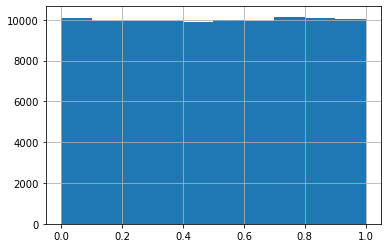

In [10]:
%matplotlib inline

n_draws = 100000
prior = pd.Series(np.random.uniform(0, 1, size=n_draws))
prior.hist()
plt.show()
observed = 14

def generative_model(param):
    result = np.random.binomial(100, param)
    return result

sim_data = list()

for p in prior:
    sim_data.append(generative_model(p))
    
posterior = prior[list(map(lambda x: x == observed, sim_data))]

Produce a set of descriptive statistics for the posterior distribution.

In [11]:
posterior.describe()

count    1063.000000
mean        0.145990
std         0.035387
min         0.062391
25%         0.120062
50%         0.142316
75%         0.169555
max         0.265809
dtype: float64

What is the 90% credible interval range?

In [12]:
print(posterior.quantile(.05), '|', posterior.quantile(.95))

0.09268912207310231 | 0.21036018515292818


What is the Maximum Likelihood Estimate?

In [13]:
rounded = posterior.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|',probability)

Maximum Likelihood Estimate:  0.13 | 0.1288805268109125
